In [53]:
import pandas as pd
import numpy as np 
import imblearn
from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter

In [54]:
train = pd.read_csv('train_cleaned1.csv')
test = pd.read_csv('test_cleaned1.csv')

train.drop(['Unnamed: 0', 'Unnamed: 0.1','Molecular_Weight_molecule', 
            'Topological_Polar_Surface_Area_molecule', 
            'Number_of_Hydrogen_Bond_Donors_molecule'],axis=1, inplace = True)
       #     'Molecular_Weight_molecule',
       # 'Topological_Polar_Surface_Area_molecule',
       # 'Number_of_Rotatable_Bonds_molecule',
       # 'Number_of_Hydrogen_Bond_Donors_molecule'], axis=1, inplace = True)
test.drop(['Unnamed: 0', 'Unnamed: 0.1','Molecular_Weight_molecule', 
           'Topological_Polar_Surface_Area_molecule', 
           'Number_of_Hydrogen_Bond_Donors_molecule'], axis=1, inplace = True)
       #     'Molecular_Weight_molecule',
       # 'Topological_Polar_Surface_Area_molecule',
       # 'Number_of_Rotatable_Bonds_molecule',
       # 'Number_of_Hydrogen_Bond_Donors_molecule'], axis=1, inplace = True)

In [55]:
train.head()

,id,Molecular_Weight_block1,Topological_Polar_Surface_Area_block1,Number_of_Rotatable_Bonds_block1,Number_of_Hydrogen_Bond_Donors_block1,Molecular_Weight_block2,Topological_Polar_Surface_Area_block2,Number_of_Rotatable_Bonds_block2,Number_of_Hydrogen_Bond_Donors_block2,Molecular_Weight_block3,Topological_Polar_Surface_Area_block3,Number_of_Rotatable_Bonds_block3,Number_of_Hydrogen_Bond_Donors_block3,Number_of_Rotatable_Bonds_molecule,binds,protein_name
0,47891720,452.304,75.63,2.0,3.0,163.995,51.80,1.0,3.0,290.797,63.40,1.0,5.0,4.0,0,-1
1,229779481,439.265,88.52,2.0,4.0,259.265,92.50,2.0,4.0,219.248,78.85,1.0,6.0,5.0,0,0
2,257335782,421.880,75.63,2.0,3.0,168.624,64.35,2.0,3.0,163.220,35.25,1.0,2.0,5.0,0,1
3,238693097,379.456,75.63,2.0,3.0,220.320,45.39,1.0,4.0,212.684,56.73,1.0,4.0,4.0,0,-1
4,37593660,403.434,84.86,2.0,4.0,155.600,35.25,1.0,2.0,185.654,35.25,1.0,2.0,4.0,0,1


In [56]:
y = train[['binds']]
train.drop(['binds'], axis=1, inplace=True)

In [57]:
train.columns

Index(['id', 'Molecular_Weight_block1',
       'Topological_Polar_Surface_Area_block1',
       'Number_of_Rotatable_Bonds_block1',
       'Number_of_Hydrogen_Bond_Donors_block1', 'Molecular_Weight_block2',
       'Topological_Polar_Surface_Area_block2',
       'Number_of_Rotatable_Bonds_block2',
       'Number_of_Hydrogen_Bond_Donors_block2', 'Molecular_Weight_block3',
       'Topological_Polar_Surface_Area_block3',
       'Number_of_Rotatable_Bonds_block3',
       'Number_of_Hydrogen_Bond_Donors_block3',
       'Number_of_Rotatable_Bonds_molecule', 'protein_name'],
      dtype='object')

In [58]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

rs =123
def grid_search_xgb(X_train, y_train):
    # Define the parameter grid for XGBoost
    params_grid = {
        'max_depth': [15, 20], #[5, 10, 15, 20],
        'n_estimators': [50, 100],
        # 'learning_rate': [0.1, 0.5, 1],
        'scale_pos_weight':[4,10] #[0.1, 0.5, 2, 10]
    }

    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Scale X_train, X_test, and test
    X_train_scaled = scaler.fit_transform(X_train.drop('id', axis=1))
    X_test_scaled = scaler.transform(x_test.drop('id', axis=1))
    test_scaled = scaler.transform(test.drop('id', axis=1))

    # Initialize the XGBClassifier model
    xgb_model = XGBClassifier(random_state=rs)

    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=2, verbose=1)
    grid_search.fit(X_train_scaled, y_train)

    # Predict on the scaled test set
    preds = grid_search.predict(X_test_scaled)
    probs = grid_search.predict_proba(X_test_scaled)[:, 1]
    submit = grid_search.predict_proba(test_scaled)[:, 1]

    # Create submission DataFrame and save to CSV
    submit_df = pd.DataFrame({'id': test['id'], 'binds': submit})
    submit_df.to_csv('submit_6__xg.csv', index=False)

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - XGBoost:\n', cm)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='XGBoost')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop('id', axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - XGBoost')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()

    # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - XGBoost:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)

In [59]:
def split_data(df, target):
    return train_test_split(df, target, test_size=0.3, stratify=y, random_state = 123)

In [60]:
# Split the training and testing dataset
x_train, x_test, y_train, y_test = split_data(train, y)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Confusion Matrix - XGBoost:
 [[1161379   38621]
 [  23836   96164]]


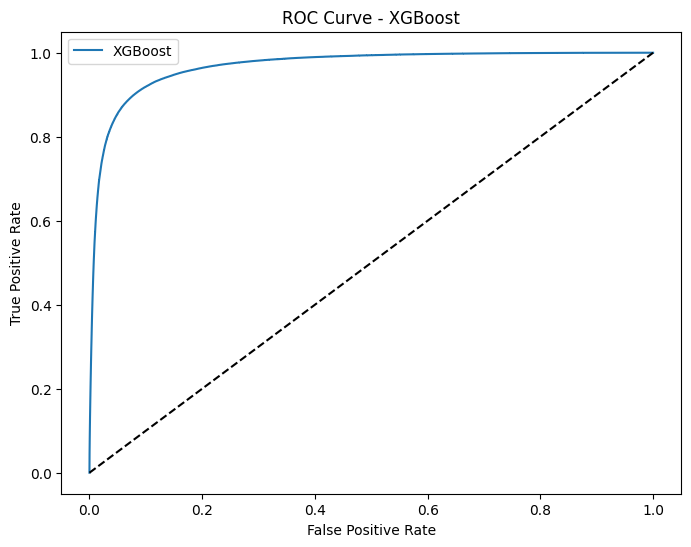

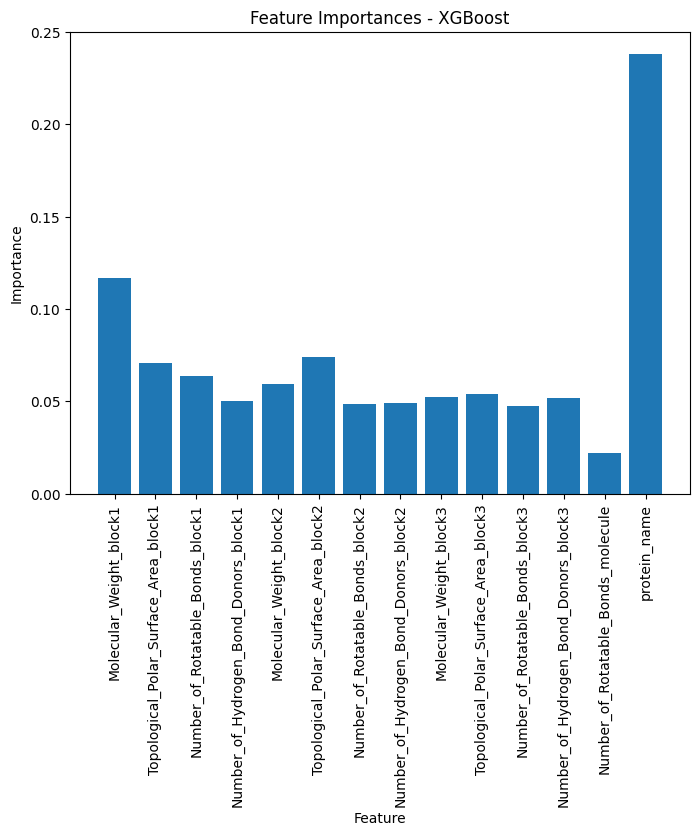

Metrics - XGBoost:
F1 Score: 0.7548639048609612
Recall: 0.8013666666666667
Precision: 0.7134621805097007
Accuracy: 0.9526840909090909


In [61]:
grid_search_xgb(x_train, y_train)

### Lets try different methods of predicting imbalance data sets, to help with doing the job

#### method to evaluate and train randomforest

In [39]:
def build_rf(X_train, y_train, X_test, threshold=0.5, best_params=None):
    
    model = RandomForestClassifier(random_state = rs)
    # If best parameters are provided
    if best_params:
        model = RandomForestClassifier(random_state = rs,
                                   # If bootstrap sampling is used
                                   bootstrap = best_params['bootstrap'],
                                   # Max depth of each tree
                                   max_depth = best_params['max_depth'],
                                   # Class weight parameters
                                   class_weight=best_params['class_weight'],
                                   # Number of trees
                                   n_estimators=best_params['n_estimators'],
                                   # Minimal samples to split
                                   min_samples_split=best_params['min_samples_split'])
    # Train the model   
    model.fit(X_train, y_train)
    # If predicted probability is largr than threshold (default value is 0.5), generate a positive label
    predicted_proba = model.predict_proba(X_test)
    yp = (predicted_proba [:,1] >= threshold).astype('int')
    return yp, model

#### Method to evaluate

In [40]:
rs = 123
def evaluate(yt, yp, eval_type="Original"):
    results_pos = {}
    results_pos['type'] = eval_type
    # Accuracy
    results_pos['accuracy'] = accuracy_score(yt, yp)
    # Precision, recall, Fscore
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, beta=5, pos_label=1, average='binary')
    results_pos['recall'] = recall
    # AUC
    results_pos['auc'] = roc_auc_score(yt, yp)
    # Precision
    results_pos['precision'] = precision
    # Fscore
    results_pos['fscore'] = f_beta
    return results_pos

##### Method to resample original dataset

In [41]:
def resample(X_train, y_train):
    # SMOTE sampler (Oversampling)
    smote_sampler = SMOTE(random_state = 123)
    # Undersampling
    under_sampler = RandomUnderSampler(random_state=123)
    # Resampled datasets
    X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    return X_smo, y_smo, X_under, y_under

#### Method to visualise metrics

In [42]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(5)
    original = df.iloc[0, 1:].values
    class_weight = df.iloc[1, 1:].values
    smote = df.iloc[2, 1:].values
    under = df.iloc[3, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.bar(x+0.2, smote, width, color='#2980b9')
    plt.bar(x+0.4, under, width, color='#3498db')
    plt.xticks(x, ['Accuracy', 'Recall', 'AUC', 'Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.legend(["Original", "Class Weight", "SMOTE", "Undersampling"])
    plt.show()

In [43]:
# Tuned random forest parameters
best_params_no_weight = {'bootstrap': True,
                         'class_weight': None, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

#### Create a list to compare and assemble all metrics in one place

In [44]:
results = []

In [46]:
preds, model = build_rf(x_train, y_train, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds, "Original")
print(result)
results.append(result)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'type': 'Original', 'accuracy': 0.9359356060606061, 'recall': 0.3122666666666667, 'auc': 0.6552845833333333, 'precision': 0.9484421271102786, 'fscore': 0.32053598130487526}


#### Lets try class weight

In [47]:
class_weight = {}
# 0.2 to Non-churn class
class_weight[0] = 0.2
# 0.8 to Churn class
class_weight[1] = 0.8

# Pre-tuned hyper parameters
best_params_weight = {'bootstrap': True,
                         'class_weight': class_weight, 
                         'max_depth': 10, 
                         'min_samples_split': 5, 
                         'n_estimators': 50}

# class weight
preds_cw, weight_model = build_rf(x_train, y_train, x_test, best_params=best_params_weight)

result = evaluate(y_test, preds_cw, "Class Weight")
print(result)
results.append(result)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'type': 'Class Weight', 'accuracy': 0.9381189393939394, 'recall': 0.39529166666666665, 'auc': 0.6938466666666666, 'precision': 0.8387707106607961, 'fscore': 0.403497011175661}


#### Try SMOTE and Undersampling

In [48]:
# X_smo is resampled from X_train using SMOTE
# y_smo is resampled from y_train using SMOTE
# X_under is resampled from X_train using Undersampling
# y_under is resampled from y_train using Undersampling
X_smo, y_smo, X_under, y_under = resample(x_train, y_train)

#### Train with Oversampled SMOTE
preds_smo, smo_model = build_rf(X_smo, y_smo, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_smo, "SMOTE")
print(result)
results.append(result)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'type': 'SMOTE', 'accuracy': 0.9350666666666667, 'recall': 0.37461666666666665, 'auc': 0.6828641666666666, 'precision': 0.8082344480402733, 'fscore': 0.3825096052519619}


#### Train WIth Undersampled SMOTE

In [49]:
preds_under, under_model = build_rf(X_under, y_under, x_test, best_params=best_params_no_weight)
result = evaluate(y_test, preds_under, "Undersampling")
print(result)
results.append(result)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'type': 'Undersampling', 'accuracy': 0.9026219696969697, 'recall': 0.6084083333333333, 'auc': 0.7702258333333333, 'precision': 0.47237588721313173, 'fscore': 0.6017434460686555}


### Compare the performance among different random forest models

By now, we have built four different random forest models: the model trained with the original dataset, the model with class weights, the model trained with SMOTE dataset, and the model trained with undersampling. 

To better analyze and compare their performance, we can visualize the metrics using a grouped bar chart.


            type  accuracy    recall       auc  precision    fscore
0       Original  0.935936  0.312267  0.655285   0.948442  0.320536
1   Class Weight  0.938119  0.395292  0.693847   0.838771  0.403497
2          SMOTE  0.935067  0.374617  0.682864   0.808234  0.382510
3  Undersampling  0.902622  0.608408  0.770226   0.472376  0.601743


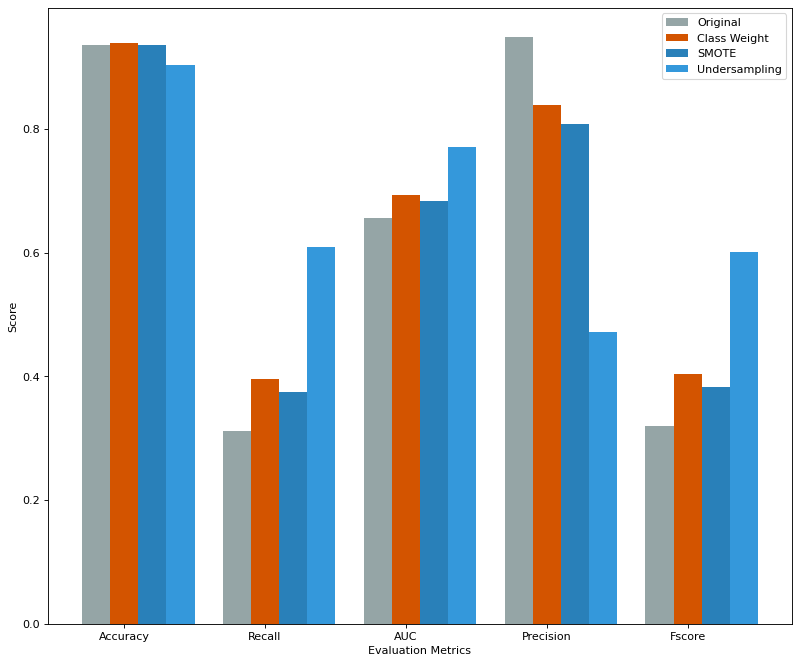

In [50]:
visualize_eval_metrics(results)

Let's first see what each color means. The grey bars represent the original model, the orange bars represent the model with class weight, the dark blue bars represent model trained with SMOTE, and the light blue bars represent the model trained with undersampling.

As we can infer the following insights from the bar charts:

- All models have high accuracy
- Recall is improved with class weights and resampling methods, and undersampling produces the highest recall
- AUC is also improved with class weights and resampling methods, and undersampling produces the highest AUC again
- Precisions are decreased with class weights and resampling methods as they all introduced many false positives (which are expected as we are trying to increase the impact of the positive class)
- Fscore is improved with class weights and resampling method, and undersampling has the highest Fscore

By analyzing the bar chart above, we can see that undersampling seems to be the best method to help alleviate the imbalanced challenge in identify protein binders. Although all class weights, SMOTE, and undersampling decreased the precision (increased false positives) but sometimes it is not a bad idea to assume some of the proteins are binders and then later discover they not than to lose few binders insside millions of non binder that would be difficult to identify without automation. A trade-off I am willing to accept.


### Lets define a utility function with undersampling technique to test

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Confusion Matrix - XGBoost:
 [[1034821  165179]
 [   7249  112751]]


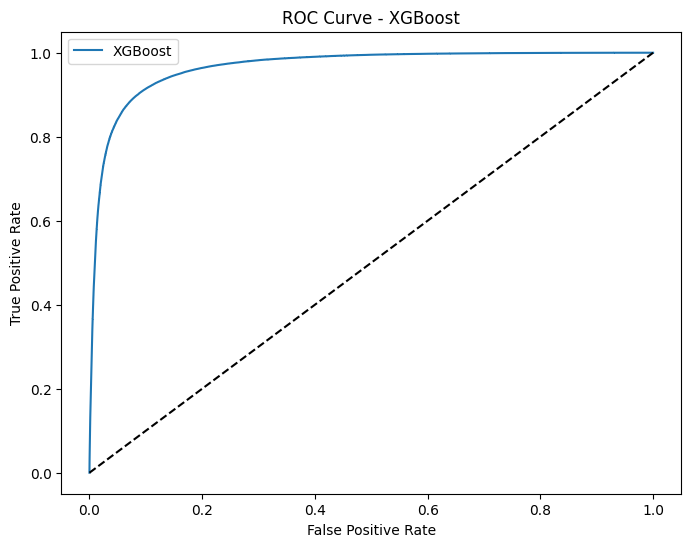

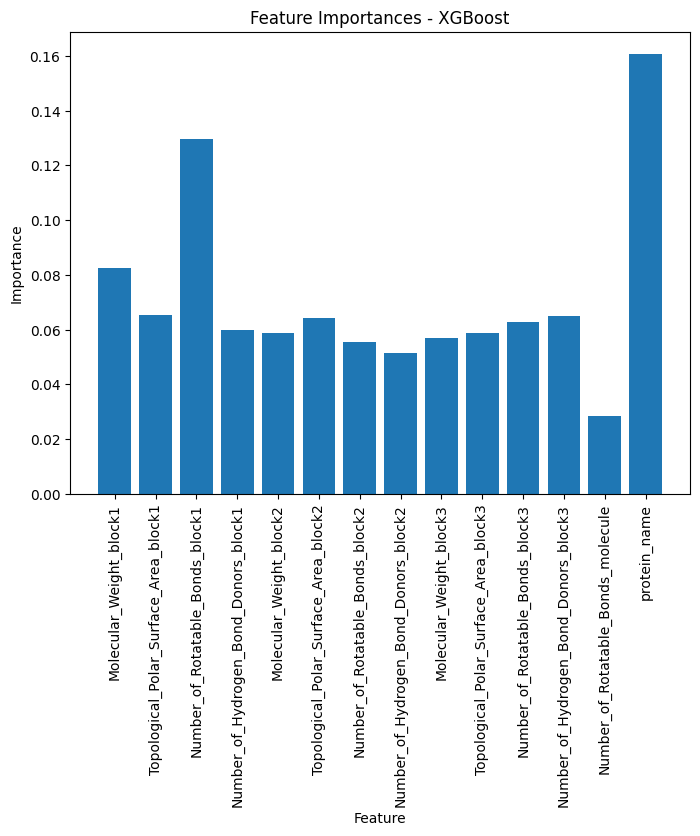

Metrics - XGBoost:
F1 Score: 0.5666876083733319
Recall: 0.9395916666666667
Precision: 0.4056812866549131
Accuracy: 0.8693727272727273


In [62]:
rs = 123

def grid_search_xgb_undersample(X_train, y_train):
    # Define the parameter grid for XGBoost
    params_grid = {
        'max_depth': [15, 20],
        'n_estimators': [75, 100],
        'scale_pos_weight':[5,10],
        # 'learning_rate': [0.1, 0.5, 1]
    }

    # Initialize the Standard Scaler
    scaler = StandardScaler()
        # Scale X_train, X_test, and test
    X_test_scaled = scaler.fit_transform(x_test.drop('id', axis=1))
    test_scaled = scaler.transform(test.drop('id', axis=1))

    # Initialize the RandomUnderSampler
    under_sampler = RandomUnderSampler(random_state=rs)

    # Fit and resample the data
    X_under, y_under = under_sampler.fit_resample(X_train.drop('id', axis=1), y_train)

    # Scale the resampled x_train
    X_under_scaled = scaler.transform(X_under)

    # Initialize the XGBClassifier model
    xgb_model = XGBClassifier(random_state=rs)

    # Perform GridSearchCV with 2-fold cross-validation
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params_grid, scoring='f1', cv=2, verbose=1)
    grid_search.fit(X_under_scaled, y_under)

    # Predict on the scaled test set
    preds = grid_search.predict(X_test_scaled)
    probs = grid_search.predict_proba(X_test_scaled)[:, 1]
    submit = grid_search.predict_proba(test_scaled)[:, 1]

    # Create submission DataFrame and save to CSV
    submit_df = pd.DataFrame({'id': test['id'], 'binds': submit})
    submit_df.to_csv('submit_7__xg.csv', index=False)

    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    print('Confusion Matrix - XGBoost:\n', cm)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='XGBoost')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('ROC Curve - XGBoost')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Feature importance
    feature_importances = grid_search.best_estimator_.feature_importances_
    feature_names = X_train.drop('id', axis=1).columns
    plt.figure(figsize=(8, 6))
    plt.bar(feature_names, feature_importances)
    plt.title('Feature Importances - XGBoost')
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.xticks(rotation=90)
    plt.show()

    # Classification metrics report
    f1 = f1_score(y_test, preds)
    recall = recall_score(y_test, preds)
    precision = precision_score(y_test, preds)
    accuracy = accuracy_score(y_test, preds)
    print('Metrics - XGBoost:')
    print('F1 Score:', f1)
    print('Recall:', recall)
    print('Precision:', precision)
    print('Accuracy:', accuracy)

grid_search_xgb_undersample(x_train, y_train)